In [1]:
%matplotlib inline
import os
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                             
from matplotlib import style
from IPython.display import Image
import scipy
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sns.set_style('whitegrid')
sns.set_palette('colorblind')
FIG_SIZE = (12, 5)

In [8]:

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 40}
plt.rc('font', **font)

C:\Users\Ahmed\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


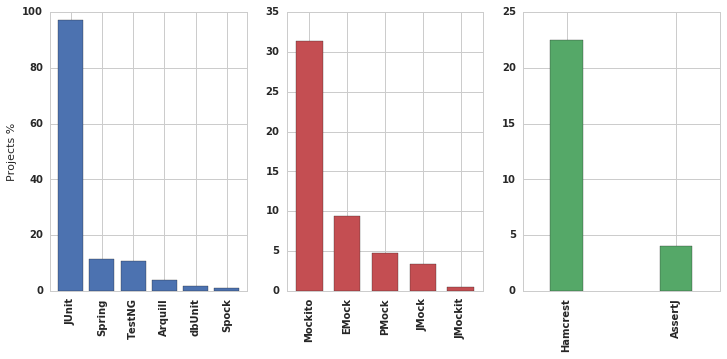

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3)
testing_popularity = pd.read_csv('../testing/era_saner2017/testing_popularity.csv', sep=';', index_col=None)
testing_popularity['number2']=(testing_popularity['number'])*100/4532
testing_popularity= testing_popularity.sort_values(["number2"], ascending=False)
ax=testing_popularity[testing_popularity.categorie=='testing'].plot(ax=axes[0], kind='bar', by='X', width = .8, x="library", y='number2', color="b")
ax.set_ylabel('Projects %')
ax.set_xlabel('')
ax.set_ylim(0,100)
ax.legend('')
ax=testing_popularity[testing_popularity.categorie=='mocking'].plot(ax=axes[1], by='X', kind='bar', width = .7, x="library", y='number2', color="r")
ax.set_xlabel('')
ax.legend('')
#ax.set_ylim(0,100)

ax=testing_popularity[testing_popularity.categorie=='matching'].plot(ax=axes[2],by='X', kind='bar', width = .3, x="library", y='number2', color="g")
#ax.set_ylim(0,100)
ax.legend('')
ax.set_xlabel('')
fig = plt.gcf()
fig.set_size_inches(FIG_SIZE)
fig.savefig('Popularity.png', bbox_inches='tight', facecolor='white')

In [261]:
testing_popularity

,library,number,categorie,number2
0,JUnit,4400,testing,97.087379
6,Mockito,1420,mocking,31.332745
2,Hamcrest,1019,matching,22.484554
3,Spring,514,testing,11.341571
1,TestNG,496,testing,10.944395
7,EMock,426,mocking,9.399823
8,PMock,215,mocking,4.744042
9,AssertJ,184,matching,4.060018
4,Arquill,177,testing,3.905560
12,JMock,152,mocking,3.353928


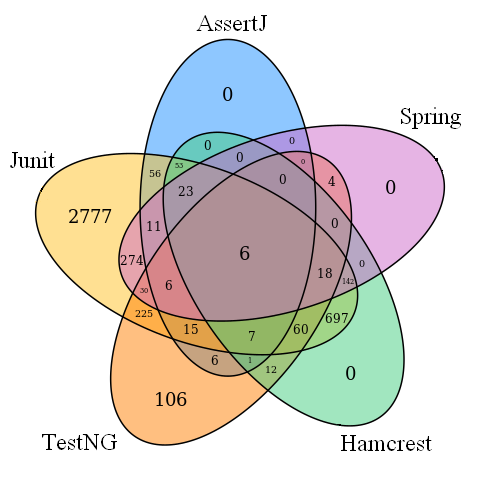

In [5]:
Image("testing/Figures/testing-venn.png")

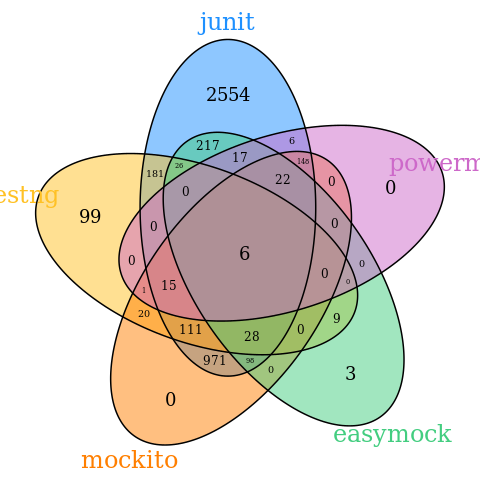

In [3]:
Image("testing/Figures/mocking-venn.png")

In [19]:
metrics = pd.read_csv('testing/metrics_about_projects_2yrs.csv', sep=';', index_col=None)
metrics= metrics.sort_values(["Contributors"], ascending=False)
len(metrics)
len(metrics)

4532

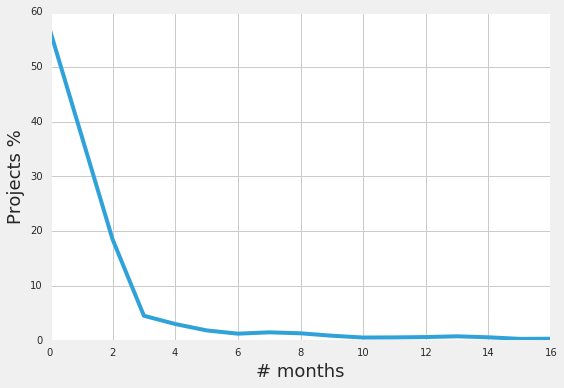

In [77]:
i=True
tab={}
with open("testing/era_saner2017/metrics_about_projects_2yrs.csv") as csvfile:
    for line in csvfile.readlines():
        if(i):
            i=False
            continue;
        line=line.split(";")
        line[5]=line[5].rstrip('\n')
        if(int(line[5])>0):
            c=int(line[5]) /30
        else:
            c=-1
        try:
            tab[c+1]=tab[c+1]+1
        except:
            tab[c+1]=1
months=[]
projects=[]
i=True

for x in tab:
    if(str(x).startswith('-')):
        continue
    months.append(int(x))
    projects.append(int(tab[x]))
df = pd.DataFrame({'projects':projects, 'months':months })
df= df.sort_values(["months"], ascending=True)
df['number2']=(df['projects'])*100/4532
ax=df.plot(x='months', y='number2' )#, title="When libraries are introduced")
ax.set_xlim(0,16)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
ax.set_ylabel('Projects %')
ax.set_xlabel('# months')

ax.legend('')
ax.set_axis_bgcolor('white')


In [13]:
df.head()

,months,projects,number2
0,0,2570,56.707855
1,1,839,18.512798
2,2,346,7.634598
3,3,145,3.199470
4,4,132,2.912621


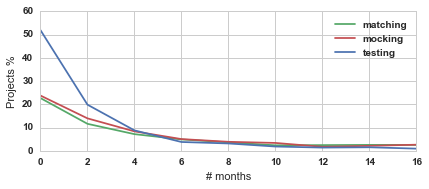

In [255]:
delete=True
result = pd.DataFrame()
for file in os.listdir("testing/when_libraries_2//"): 
    i=True
    tab={}
    with open("testing/when_libraries_2/"+file) as csvfile:
        nump=0
        file=file.rstrip('.csv')
        for line in csvfile.readlines():
            nump=nump+1
            if(i):
                i=False
                continue;
            line=line.split(";")
            line[0]=line[0].rstrip('\n')
            if(int(line[0])>0):
                c=int(line[0]) /60
            else:
                c=-1
            try:
                tab[c+1]=tab[c+1]+1
            except:
                tab[c+1]=1
            
    months=[]
    projects=[]
    i=True

    for x in tab:
        if(str(x).startswith('-')):
            continue
        months.append(int(x))
        projects.append(int(tab[x]))
    df = pd.DataFrame({'projects':projects, 'months':months })
    if delete:
        df['month']=df['months']*2
        delete=False
    df= df.sort_values(["months"], ascending=True)
    df=df.set_index('months')
    file=file.rstrip('.csv')
    df[file]=(df['projects'])*100/nump #*100/len(projects)
    df=df.drop('projects',1)
    result = pd.concat([result, df], axis=1, join_axes=[df.index])
result=result.set_index('month')
ax=result.plot(colors=['g','r','b'])#file+'-'+str(nump))
    #kind="bar" ,
ax.set_xlim(0,16)
ax.set_ylabel('Projects %')
ax.set_xlabel('# months')
ax.locator_params(axis='x',nbins=12)
fig = plt.gcf()
fig.set_size_inches(FIG_SIZE)
fig.savefig('when_libraries.pdf', bbox_inches='tight', facecolor='white')

In [155]:
result.head()

,matching,mocking,testing
months,,,
0,22.665458,23.756906,51.883795
1,11.604714,13.950276,19.836586
2,7.162285,8.356354,8.783477
3,4.895739,5.041436,3.790286
4,3.626473,3.867403,3.154789


In [194]:
result.head()

,matching,mocking,testing
month,,,
0.0,22.665458,23.756906,51.883795
2.0,11.604714,13.950276,19.836586
4.0,7.162285,8.356354,8.783477
6.0,4.895739,5.041436,3.790286
8.0,3.626473,3.867403,3.154789


9
2
4


In [43]:
result.head()

,AssertJ,EasyMock,Hamcrest,JUnit,Mockito,PowerMock,Spring,TestNG
months,,,,,,,,
0,1.081081,28.260870,24.775225,50.293772,20.716113,15.000,31.263383,38.031320
2,1.081081,13.315217,12.587413,19.388954,13.299233,8.125,21.841542,17.449664
3,NaN,4.891304,5.194805,5.710928,5.115090,4.375,4.925054,3.355705
4,0.540541,2.989130,2.597403,3.243243,3.324808,1.875,3.211991,2.908277
5,2.162162,3.260870,2.297702,2.138660,2.387042,1.875,2.569593,3.579418


In [74]:
df = pd.DataFrame()

In [78]:
when_libraries = pd.read_csv('testing/era_saner2017/when_libraries/org.jboss.arquillian.container.test.csv', sep=';', index_col=None)
when_libraries= when_libraries.sort_values('library', ascending=True)
when_libraries.rename(columns={'library': 'days'}, inplace=True)
ax=when_libraries.groupby(["days"]).size().head(10).plot(kind='bar', title="Introduction of library")
ax.set_ylabel('projects')

IOError: File testing/era_saner2017/when_libraries/org.jboss.arquillian.container.test.csv does not exist

In [88]:
df_testing = pd.read_csv('testing/era_saner2017/stats_libs_testing_2yrs.csv', 
            sep=';', 
           # index_col='Date', 
            usecols=['Date', 'TestNG' ,  'Hamcrest','Spring', 
                    'AssertJ', 'JUnit', 'total'],#'org.mockito','org.easymock',
                    #'org.powermock'], 
            parse_dates=['Date'], infer_datetime_format="%Y-%m-%d")
#df_time_libraries['Date']=pd.to_datetime(df_time_libraries['Date'],format='%d-%m-%Y')
df_mocking = pd.read_csv('testing/era_saner2017/stats_libs_testing_2yrs.csv', 
            sep=';', 
           # index_col='Date', 
            usecols=['Date','Mockito','EasyMock','PowerMock','total'], 
            parse_dates=['Date'], infer_datetime_format="%Y-%m-%d")

In [89]:
for x in df_testing.columns:
    if('Date' not in x and 'total' not in x):
        df_testing[x]=(df_testing[x])*100/df_testing['total']
for x in df_mocking.columns:
    if('Date' not in x and 'total' not in x):
        df_mocking[x]=(df_mocking[x])*100/df_mocking['total']
df_testing=df_testing.drop('total',1)
df_mocking=df_mocking.drop('total',1)

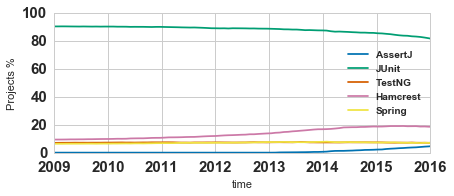

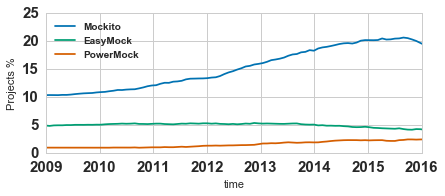

In [259]:
ax = df_testing.plot(['Date'])
#ax.legend(loc=2, fontsize = 'small')
#ax.set_title('Unit testing libraries evolution')
ax.set_xlabel('time')
ax.set_ylabel('Projects %')
ax.set_xlim('2009','2016')
#ax.set_ylim(1,100)
plt.tick_params(axis='both', which='major', labelsize=15)
fig = plt.gcf()
fig.set_size_inches(FIG_SIZE)
fig.savefig('evo_testing.pdf', bbox_inches='tight', facecolor='white')
ax = df_mocking.plot(['Date'])
#ax.legend(loc=2, fontsize = 'medium')
#ax.set_title('Mocking libraries evolution')
ax.set_xlabel('time')
ax.set_ylabel('Projects %')
ax.set_xlim('2009','2016')
plt.tick_params(axis='both', which='major', labelsize=15)
fig = plt.gcf()
fig.set_size_inches(FIG_SIZE)
fig.savefig('evo_mocking.pdf', bbox_inches='tight', facecolor='white')

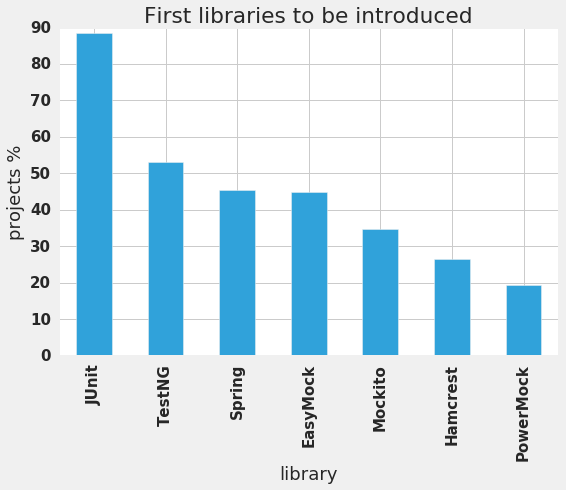

In [17]:
first_libs = pd.read_csv('testing/first_libs_2.csv', sep=';', index_col=None)
first_libs['testp']=first_libs.projects*100/first_libs.total
first_libs= first_libs.sort_values('testp', ascending=False)
ax=first_libs.plot(kind='bar', y="testp",
                   x="library", title="First libraries to be introduced")
ax.set_ylabel('projects %')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
plt.tick_params(axis='both', which='major', labelsize=15)
plt.rc('font', **font)
ax.legend('')
ax.set_axis_bgcolor('white')

In [33]:
first_libs

,library,projects,total,testp
0,junit,2127,2403,0.885144
5,org.dbunit,44,77,0.571429
1,org.testng,223,420,0.530952
3,org.springframework.test,233,514,0.453307
7,org.easymock,190,423,0.449173
6,org.mockito,492,1420,0.346479
2,org.hamcrest,271,1019,0.265947
4,org.jboss.arquillian.container.test,36,177,0.203390
8,org.powermock,42,215,0.195349


In [18]:
first_libs.head()

,library,projects,popularity,testp
8,junit,3884,4400,0.882727
1,org.mockito,492,1420,0.346479
0,org.testng,292,496,0.588710
7,org.hamcrest,271,1019,0.265947
6,org.springframework.test,233,514,0.453307


(0, 2000)

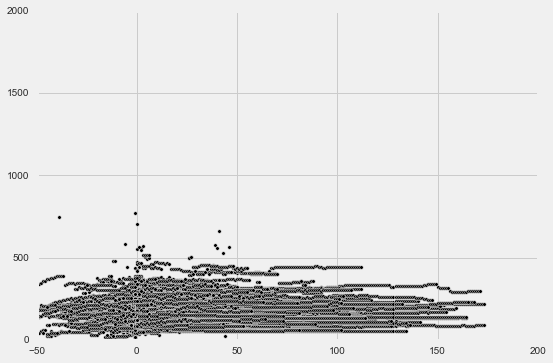

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
for x in os.listdir('testing/impact_intro/'):
    num_lines = sum(1 for line in open('testing/impact_intro/'+x))
    if(num_lines > 50 ):
        impact = pd.read_csv('testing/impact_intro/'+x, sep=';', index_col=None)
        impact['prop']=pd.Series(len(impact))
        impact['prop']=impact['loc']/impact['files']
        ax1.scatter(impact['id'], impact['prop'], s=13, c='black')
#ax1.plot([0,0],[0,2000], "r--")

ax1.set_xlim(-50)
ax1.set_ylim(0,2000)

In [4]:
impact.head()

,id,date,files,loc,prop
0,-1,2011-03-12,0,0,NaN
1,0,2011-04-12,96,7885,82.135417
2,1,2011-06-14,101,9705,96.089109
3,2,2011-07-14,139,14054,101.107914
4,3,2011-08-13,217,21127,97.359447


In [5]:
i=0
num_developers_junit=None
for file in os.listdir("../valide_mvn_java/junit/"):
    tmpData = pd.read_csv('../valide_mvn_java/junit/'+file, sep=';', index_col=None)
    if (num_developers_junit is None):
        num_developers_junit=tmpData;
        continue
    #try:
    num_developers_junit=pd.concat([num_developers_junit, tmpData])
    #    i=i+1
    #except:
     #   pass
i=0
num_developers_testng=None
for file in os.listdir("../valide_mvn_java/testng/"):
    tmpData = pd.read_csv('../valide_mvn_java/testng/'+file, sep=';', index_col=None)
    if (num_developers_testng is None):
        num_developers_testng=tmpData;
        continue
    #try:
    num_developers_testng=pd.concat([num_developers_testng, tmpData])
    #    i=i+1
    #except:
     #   pass

WindowsError: [Error 3] Le chemin d’accès spécifié est introuvable: '../valide_mvn_java/junit/*.*'

In [159]:
len(num_developers_junit[num_developers_junit['developers']==0])

0

In [ ]:
num_developers_testng['effort']=(num_developers_testng.added + num_developers_testng.removed)
num_developers_junit['effort']=(num_developers_junit.added + num_developers_junit.removed)

In [ ]:
ax = sns.boxplot(x="test", y="effort", data=num_developers_junit[num_developers_junit['effort']>0])
#ax = sns.stripplot(x="test", y="developers", data=num_developers, jitter=True)
ax.set_xlabel('Java files')
#ax.set_ylim(0,30)
ax.set_yscale('log')
ax.set_axis_bgcolor('white')

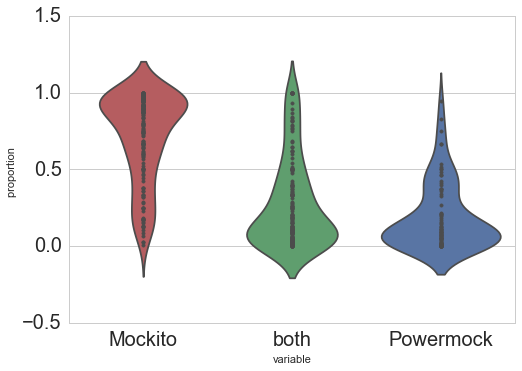

In [2]:
occurence_files = pd.read_csv('../../saner2017/csv/occurences/occurence_mockito_powermock.csv', sep=';', index_col=None)
occurence_melted=pd.melt(occurence_files, id_vars=['project'], value_vars=['Mockito','both','Powermock'])
#ax = sns.boxplot(x="variable", y="value", data=occurence_melted[occurence_melted['value']>0])
ax = sns.violinplot(x="variable", y="value", data=occurence_melted[occurence_melted['value']>0], palette=['r','g','b'],
                    inner='points', color="0.7")
ax.set_axis_bgcolor('white')
ax.set_ylabel('proportion ')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
ax.set_axis_bgcolor('white')
ax.set_ylim(-0.5,1.5)
plt.tick_params(axis='both', which='major', labelsize=20)


In [37]:
scipy.stats.ks_2samp(occurence_files.Mockito,occurence_files.Powermock)

Ks_2sampResult(statistic=0.72395833333333326, pvalue=2.6265716992025195e-45)

In [4]:
occurence_files.head()

,project,Mockito,Powermock,both
0,42BV_jarb.git.csv,0.947368,0.000000,0.052632
1,aadnk_ProtocolLib.git.csv,0.321839,0.517241,0.160920
2,AdamBien_lightfish.git.csv,0.916667,0.000000,0.083333
3,aerogear_aerogear-unifiedpush-java-client.git.csv,0.230769,0.000000,0.769231
4,alexruiz_fest-assert-2.x.git.csv,0.999815,0.000000,0.000185


(-0.5, 1.5)

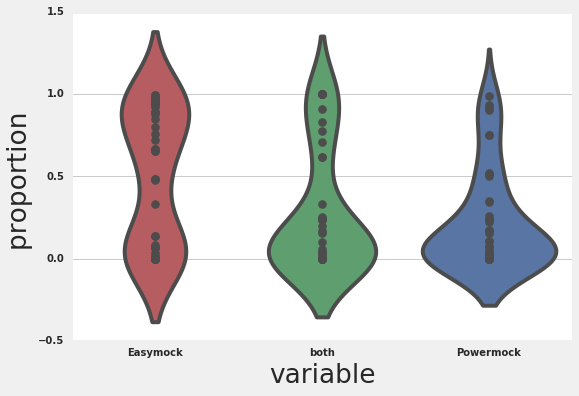

In [25]:
occurence_files = pd.read_csv('../valide_mvn_java/csv/occurence_easymock_powermock.csv', sep=';', index_col=None)
occurence_melted=pd.melt(occurence_files, id_vars=['project'], value_vars=['Easymock','both','Powermock'])
#ax = sns.boxplot(x="variable", y="value", data=occurence_melted[occurence_melted['value']>0])
ax = sns.violinplot(x="variable", y="value", data=occurence_melted, palette=['r','g','b'],
                    inner='points', color="0.7")
ax.set_axis_bgcolor('white')
ax.set_ylabel('proportion ')
ax.set_ylim(-0.5,1.5)

In [18]:
scipy.stats.ks_2samp(occurence_files.Easymock,occurence_files.Powermock)

Ks_2sampResult(statistic=0.37777777777777782, pvalue=0.0021926070110580664)

(-0.5, 1.5)

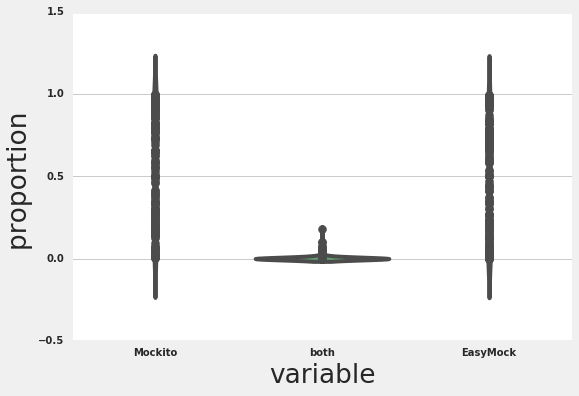

In [22]:
occurence_files = pd.read_csv('../valide_mvn_java/csv/occurence_mockito_easymock.csv', sep=';', index_col=None)
occurence_melted=pd.melt(occurence_files, id_vars=['project'], value_vars=['Mockito','both','EasyMock'])
#ax = sns.boxplot(x="variable", y="value", data=occurence_melted[occurence_melted['value']>0])
ax = sns.violinplot(x="variable", y="value", data=occurence_melted, palette=['r','g','b'],
                    inner='points', color="0.7")
ax.set_axis_bgcolor('white')
ax.set_ylabel('proportion ')
ax.set_ylim(-0.5,1.5)

In [22]:
scipy.stats.ks_2samp(occurence_files.EasyMock,occurence_files.Mockito)

Ks_2sampResult(statistic=0.1103896103896104, pvalue=0.28833825348392911)

(-0.5, 1.5)

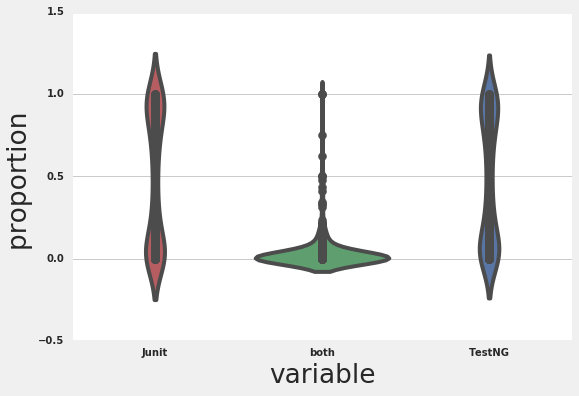

In [23]:
occurence_files = pd.read_csv('../valide_mvn_java/csv/occurence_junit_testng.csv', sep=';', index_col=None)
occurence_melted=pd.melt(occurence_files, id_vars=['project'], value_vars=['Junit','both','TestNG'])
#ax = sns.boxplot(x="variable", y="value", data=occurence_melted[occurence_melted['value']>0])
ax = sns.violinplot(x="variable", y="value", data=occurence_melted, palette=['r','g','b'],
                    inner='points', color="0.7")
ax.set_axis_bgcolor('white')
ax.set_ylabel('proportion ')
ax.set_ylim(-0.5,1.5)

In [32]:
scipy.stats.ks_2samp(occurence_files.Junit,occurence_files.TestNG)

Ks_2sampResult(statistic=0.11716621253405995, pvalue=0.011787064173170993)

(-0.5, 1.5)

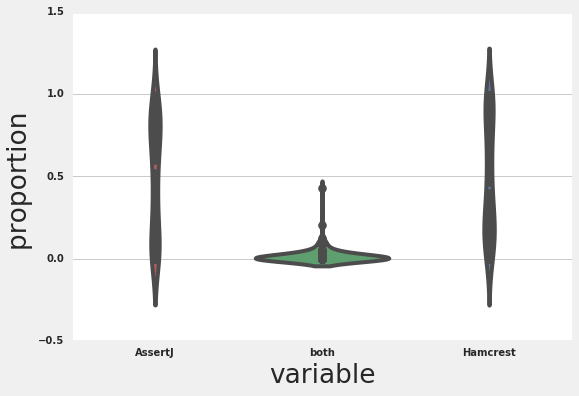

In [24]:
occurence_files = pd.read_csv('../valide_mvn_java/csv/occurence_assertj_hamcrest.csv', sep=';', index_col=None)
occurence_melted=pd.melt(occurence_files, id_vars=['project'], value_vars=['AssertJ','both','Hamcrest'])
#ax = sns.boxplot(x="variable", y="value", data=occurence_melted[occurence_melted['value']>0])
ax = sns.violinplot(x="variable", y="value", data=occurence_melted, palette=['r','g','b'],
                    inner='points', color="0.7")
ax.set_axis_bgcolor('white')
ax.set_ylabel('proportion ')
ax.set_ylim(-0.5,1.5)

In [26]:
scipy.stats.ks_2samp(occurence_files.AssertJ,occurence_files.Hamcrest)

Ks_2sampResult(statistic=0.13333333333333333, pvalue=0.37555207849295752)

In [12]:
after_before_when = pd.read_csv('../valide_mvn_java/csv/after_before_when.csv', sep=';', index_col=None)

In [52]:
df=after_before_when[after_before_when.testing != -100]
before=len(df[(df.testing<df.mocking) & (after_before_when.mocking != -100)])
after=len(df[(df.testing>df.mocking) & (after_before_when.mocking != -100)])
same=len(df[(df.testing==df.mocking) & (after_before_when.mocking != -100)])
print(str(before)+';'+str(after)+';'+str(same))

836;10;597


In [53]:
df=after_before_when[after_before_when.testing != -100]
before=len(df[(df.testing<df.matching) & (after_before_when.matching != -100)])
after=len(df[(df.testing>df.matching) & (after_before_when.matching != -100)])
same=len(df[(df.testing==df.matching) & (after_before_when.matching != -100)])
print(str(before)+';'+str(after)+';'+str(same))

704;10;269


In [54]:
df=after_before_when[after_before_when.matching != -100]
before=len(df[(df.matching<df.mocking) & (after_before_when.mocking != -100)])
after=len(df[(df.matching>df.mocking) & (after_before_when.mocking != -100)])
same=len(df[(df.matching==df.mocking) & (after_before_when.mocking != -100)])
print(str(before)+';'+str(after)+';'+str(same))

114;263;146


In [61]:
len(after_before_when[(after_before_when.mocking != -100) & (after_before_when.testing != -100)])

1443

In [71]:
df=after_before_when[(after_before_when.testing != -100) & (after_before_when.testing != 0)]
len(df[(df.testing==df.matching) & (df.testing==df.mocking)])


38